<a href="https://colab.research.google.com/github/Thomas241292/EssGenesBayes/blob/master/GenesBayes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

Saving EC_Features.xls to EC_Features.xls


Saving SC_Features.xls to SC_Features.xls


In [2]:
!pip install xlrd
import pandas as pd

SC = 'SC_Features.xls'
EC = 'EC_Features.xls'

SCdf = pd.ExcelFile(SC)
ECdf = pd.ExcelFile(EC)

print(SCdf.sheet_names)
print(ECdf.sheet_names)

SCdf1 = SCdf.parse('entropy discretized')
ECdf1 = ECdf.parse('entropy discretized')

SCrows, SCcolumns = SCdf1.shape
ECrows, ECcolumns = ECdf1.shape

SCdf2 = SCdf1.replace(regex=[r'^.*<.*$' , r'^.*].*$' ], value= 1 ).replace(regex=r'^.*>.*$', value= 0)
ECdf2 = ECdf1.replace(regex=[r'^.*<.*$' , r'^.*].*$' ], value= 1 ).replace(regex=r'^.*>.*$', value= 0)

['raw data', 'entropy discretized']
['raw data', 'entropy discretized']


In [13]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

def createset(df) :
  
  dfess =df[df.Essential == 1]
  dfno = df[df.Essential == 0]
  
  randomess = dfess.sample(frac=1)
  randomno = dfno.sample(frac=1)
  
  trainhalfess = randomess.head(int(len(randomess) - len(randomess)/2))
  trainhalfno = randomno.head(int(len(randomno) - len(randomno)/2))
  
  testhalfess = randomess.head(int(len(randomess)/2 - len(randomess)))
  testhalfno = randomno.head(int(len(randomno)/2 - len(randomno)))
  
  traindfess = pd.concat([trainhalfess , trainhalfno])
  testdfess = pd.concat([testhalfess , testhalfno])
  
  randtraindfess = traindfess.sample(frac=1)
  randtestdfess = testdfess.sample(frac=1)
  
  traintarget = randtraindfess[['Essential']].values
  testtarget = randtestdfess[['Essential']].values
  
  train = randtraindfess.iloc[:,1:].values
  test = randtestdfess.iloc[:,1:].values
  
  return train, traintarget, test, testtarget

def bayes(train,traintarget,test,testtarget) :

  bern = BernoulliNB()
  tr = bern.fit(train,traintarget)
  predict = bern.predict(test)
  proba = bern.predict_proba(test)
  probapos = proba[:,0]
  score = bern.score(test,testtarget)
  
  return predict,probapos,score

def roc(testtarget,proba) :
  
  fpr, tpr, _ = metrics.roc_curve(testtarget, proba)
  auc = metrics.roc_auc_score(testtarget, proba)
  return fpr,tpr,auc

def topprediction(predict,proba,target) :
  
  mat1 = np.column_stack((proba , predict, target))
  sortlist1 = sorted(mat1, key=lambda x:x[0], reverse=False)
  sortmat1 = np.array(sortlist1)
  top1 = sortmat1[0:int(len(sortmat1)/100), :]
  top5 = sortmat1[0:int(len(sortmat1)/20), :]
  top10 = sortmat1[0:int(len(sortmat1)/10), :]
  top15 = sortmat1[0:round(len(sortmat1)/6.5), :]
  top20 = sortmat1[0:int(len(sortmat1)/5), :]
  
  return top1,top5,top10,top15,top20

def ppv(topprediction) :

  veripos = 0
  pos = 0
  prediction = topprediction[:,1]
  target = topprediction[:,2]
  for i in range(len(prediction)) :
    if prediction[i]==target[i] and prediction[i]==1 :
      veripos+=1
    if prediction[i]==1:
      pos+=1
  if pos!=0:  
    prposvalue = veripos/pos
    return prposvalue     

def flat(vector):
  vector1=np.ravel(vector)
  return vector1

def media(oldvalue,value):
  return (oldvalue+value)/2
  
#feature selection
SC_All = SCdf2[['Essential' , 'phyletic_retention' , 'paralagous_count' , 'DIP_degree' , 'nucleolus' , 'nucleus' , 'upstream_size' , 'spindle pole' , 'GLU' , 'Codon_bias' , 'aromaticity_score' , 'Gravy_score' , 'CAI' , 'downstream_size' , 'vacuole' , 'endosome' , 'mitochondrion' , 'PI' , 'cytoplasm' , 'promoter_count(Harbison_et_al)' , 'vacuolar membrane' , 'MET' , 'ASP' , 'ER to Golgi' , 'GLN' , 'peroxisome' , 'num places loc' , 'LYS' , 'ambiguous' , 'cell periphery' , 'FOP_score' , 'nuclear periphery' , 'ARG' , 'Golgi to ER' , 'punctate composite' , 'ER' , 'lipid particle' , 'microtubule' , 'Golgi' , 'bud neck' , 'actin' , 'bud' , 'Golgi to Vacuole']]
SC_GenProt = SCdf2[['Essential' , 'phyletic_retention' , 'paralagous_count' , 'upstream_size' , 'GLU' , 'Codon_bias' , 'aromaticity_score' , 'Gravy_score' , 'CAI' , 'downstream_size' , 'PI' , 'MET' , 'ASP' , 'GLN' , 'LYS' , 'FOP_score' , 'ARG']]
SC_GenProt_No = SCdf2[['Essential' , 'paralagous_count' , 'upstream_size' , 'CAI' , 'GLU' , 'aromaticity_score' , 'Gravy_score' , 'downstream_size' , 'PI' , 'MET' , 'ASP' , 'GLN' , 'LYS' , 'FOP_score' , 'ARG' , 'Codon_bias']]
EC_GenProt = ECdf2[['Essential' , 'phyletic_retention' , 'Ser' , 'Trp' , 'paralog count' , 'Leu' , 'orf size' , 'Thr' , 'Cys' , 'Gln' , 'Phe' , 'Pro' , 'CAI' , 'Ile' , 'Tyr' , 'His' , 'Asn' , 'strand bias' , 'Gly' , 'Asp' , 'Fop' , 'Aromaticity' , 'Val' , 'Ala' , 'Lys' , 'Glu' , 'CBI' , 'Met' , 'Arg']]
EC_GenProt_No = ECdf2[['Essential' , 'Ser' , 'CAI' , 'Trp' , 'paralog count' , 'Leu' , 'orf size' ,'strand bias' , 'Thr' , 'Cys' , 'Gln' , 'Phe' , 'Pro' , 'Ile' , 'Tyr' , 'His' , 'Asn' , 'Gly' , 'Asp' , 'Fop' , 'Aromaticity' , 'Val' , 'Ala' , 'Lys' , 'Glu' , 'CBI' , 'Met' , 'Arg']]

for i in range(1000):
  #Create Set
  SC_AllTrain, SC_AllTargetv, SC_AllTest, SC_AllTestTargetv = createset(SC_All)
  SC_GenProtTrain, SC_GenProtTargetv, SC_GenProtTest, SC_GenProtTestTargetv = createset(SC_GenProt)
  SC_GenProt_NoTrain, SC_GenProt_NoTargetv, SC_GenProt_NoTest, SC_GenProt_NoTestTargetv = createset(SC_GenProt_No)
  EC_GenProtTrain, EC_GenProtTargetv, EC_GenProtTest, EC_GenProtTestTargetv = createset(EC_GenProt)
  EC_GenProt_NoTrain, EC_GenProt_NoTargetv, EC_GenProt_NoTest, EC_GenProt_NoTestTargetv = createset(EC_GenProt_No)

  #per evitare warning
  SC_AllTarget = flat(SC_AllTargetv)
  SC_AllTestTarget = flat(SC_AllTestTargetv)
  SC_GenProtTarget = flat(SC_GenProtTargetv)
  SC_GenProtTestTarget = flat(SC_GenProtTestTargetv)
  SC_GenProt_NoTarget = flat(SC_GenProt_NoTargetv)
  SC_GenProt_NoTestTarget = flat(SC_GenProt_NoTestTargetv)
  EC_GenProtTarget = flat(EC_GenProtTargetv)
  EC_GenProtTestTarget = flat(EC_GenProtTestTargetv)
  EC_GenProt_NoTarget = flat(EC_GenProt_NoTargetv)
  EC_GenProt_NoTestTarget = flat(EC_GenProt_NoTestTargetv)

  #Bayes
  SC_Allpredict, SC_Allproba, SC_Allscore = bayes(SC_AllTrain, SC_AllTarget, SC_AllTest, SC_AllTestTarget)
  SC_GenProtpredict, SC_GenProtproba, SC_GenProtscore = bayes(SC_GenProtTrain, SC_GenProtTarget, SC_GenProtTest, SC_GenProtTestTarget) 
  SC_GenProt_Nopredict, SC_GenProt_Noproba, SC_GenProt_Noscore = bayes(SC_GenProt_NoTrain, SC_GenProt_NoTarget, SC_GenProt_NoTest, SC_GenProt_NoTestTarget) 
  EC_GenProtpredict, EC_GenProtproba, EC_GenProtscore = bayes(EC_GenProtTrain, EC_GenProtTarget, EC_GenProtTest, EC_GenProtTestTarget) 
  EC_GenProt_Nopredict, EC_GenProt_Noproba, EC_GenProt_Noscore = bayes(EC_GenProt_NoTrain, EC_GenProt_NoTarget, EC_GenProt_NoTest, EC_GenProt_NoTestTarget) 
  
  #ROC-AUC
  SC_Allfpr, SC_Alltpr, SC_Allauc = roc(SC_AllTestTarget,SC_Allproba)
  SC_GenProtfpr, SC_GenProttpr, SC_GenProtauc = roc(SC_GenProtTestTarget, SC_GenProtproba)
  SC_GenProt_Nofpr, SC_GenProt_Notpr, SC_GenProt_Noauc = roc(SC_GenProt_NoTestTarget, SC_GenProt_Noproba)
  EC_GenProtfpr, EC_GenProttpr, EC_GenProtauc = roc(EC_GenProtTestTarget, EC_GenProtproba)
  EC_GenProt_Nofpr, EC_GenProt_Notpr, EC_GenProt_Noauc = roc(EC_GenProtTestTarget, EC_GenProtproba)  

  #Top Predictions
  SC_Alltop1 , SC_Alltop5 , SC_Alltop10 , SC_Alltop15 , SC_Alltop20  = topprediction(SC_Allpredict, SC_Allproba, SC_AllTestTarget)
  SC_GenProttop1 , SC_GenProttop5 , SC_GenProttop10 , SC_GenProttop15 , SC_GenProttop20 = topprediction(SC_GenProtpredict, SC_GenProtproba, SC_GenProtTestTarget)
  SC_GenProt_Notop1 , SC_GenProt_Notop5 , SC_GenProt_Notop10 , SC_GenProt_Notop15 , SC_GenProt_Notop20 = topprediction(SC_GenProt_Nopredict, SC_GenProt_Noproba, SC_GenProt_NoTestTarget)
  EC_GenProttop1 , EC_GenProttop5 , EC_GenProttop10 , EC_GenProttop15 , EC_GenProttop20 = topprediction(EC_GenProtpredict, EC_GenProtproba, EC_GenProtTestTarget)
  EC_GenProt_Notop1 , EC_GenProt_Notop5 , EC_GenProt_Notop10 , EC_GenProt_Notop15 , EC_GenProt_Notop20 = topprediction(EC_GenProt_Nopredict, EC_GenProt_Noproba, EC_GenProt_NoTestTarget)
    
  #PPV
  SC_Allppv1 = ppv(SC_Alltop1)
  SC_Allppv5 = ppv(SC_Alltop5)
  SC_Allppv10 = ppv(SC_Alltop10)
  SC_Allppv15 = ppv(SC_Alltop15)
  SC_Allppv20 = ppv(SC_Alltop20)
  SC_GenProtppv1 = ppv(SC_GenProttop1)
  SC_GenProtppv5 = ppv(SC_GenProttop5)
  SC_GenProtppv10 = ppv(SC_GenProttop10)
  SC_GenProtppv15 = ppv(SC_GenProttop15)
  SC_GenProtppv20 = ppv(SC_GenProttop20)
  SC_GenProt_Noppv1 = ppv(SC_GenProt_Notop1)
  SC_GenProt_Noppv5 = ppv(SC_GenProt_Notop5)
  SC_GenProt_Noppv10 = ppv(SC_GenProt_Notop10)
  SC_GenProt_Noppv15 = ppv(SC_GenProt_Notop15)
  SC_GenProt_Noppv20 = ppv(SC_GenProt_Notop20)
  EC_GenProtppv1 = ppv(EC_GenProttop1)
  EC_GenProtppv5 = ppv(EC_GenProttop5)
  EC_GenProtppv10 = ppv(EC_GenProttop10)
  EC_GenProtppv15 = ppv(EC_GenProttop15)
  EC_GenProtppv20 = ppv(EC_GenProttop20)
  EC_GenProt_Noppv1 =ppv(EC_GenProt_Notop1)
  EC_GenProt_Noppv5 =ppv(EC_GenProt_Notop5)
  EC_GenProt_Noppv10 =ppv(EC_GenProt_Notop10)
  EC_GenProt_Noppv15 =ppv(EC_GenProt_Notop15)
  EC_GenProt_Noppv20 =ppv(EC_GenProt_Notop20)

  if i==0:
    SC_Allppv1Mean = SC_Allppv1
    SC_Allppv5Mean = SC_Allppv5
    SC_Allppv10Mean = SC_Allppv10
    SC_Allppv15Mean = SC_Allppv15
    SC_Allppv20Mean = SC_Allppv20
    SC_GenProtppv1Mean = SC_GenProtppv1
    SC_GenProtppv5Mean = SC_GenProtppv5
    SC_GenProtppv10Mean = SC_GenProtppv10
    SC_GenProtppv15Mean = SC_GenProtppv15
    SC_GenProtppv20Mean = SC_GenProtppv20
    SC_GenProt_Noppv1Mean = SC_GenProtppv1
    SC_GenProt_Noppv5Mean = SC_GenProtppv5
    SC_GenProt_Noppv10Mean = SC_GenProtppv10
    SC_GenProt_Noppv15Mean = SC_GenProtppv15
    SC_GenProt_Noppv20Mean = SC_GenProtppv20
    EC_GenProtppv1Mean = EC_GenProtppv1
    EC_GenProtppv5Mean = EC_GenProtppv5
    EC_GenProtppv10Mean = EC_GenProtppv10
    EC_GenProtppv15Mean = EC_GenProtppv15
    EC_GenProtppv20Mean = EC_GenProtppv20
    EC_GenProt_Noppv1Mean = EC_GenProt_Noppv1
    EC_GenProt_Noppv5Mean = EC_GenProt_Noppv5
    EC_GenProt_Noppv10Mean = EC_GenProt_Noppv10
    EC_GenProt_Noppv15Mean = EC_GenProt_Noppv15
    EC_GenProt_Noppv20Mean = EC_GenProt_Noppv20
  else:
    SC_Allppv1Mean = media(SC_Allppv1Mean, SC_Allppv1)
    SC_Allppv5Mean = media(SC_Allppv5Mean, SC_Allppv5)
    SC_Allppv10Mean = media(SC_Allppv10Mean, SC_Allppv10)
    SC_Allppv15Mean = media(SC_Allppv15Mean, SC_Allppv15)
    SC_Allppv20Mean = media(SC_Allppv20Mean, SC_Allppv20)
    SC_GenProtppv1Mean = media(SC_GenProtppv1Mean, SC_GenProtppv1)
    SC_GenProtppv5Mean = media(SC_GenProtppv5Mean, SC_GenProtppv5)
    SC_GenProtppv10Mean = media(SC_GenProtppv10Mean, SC_GenProtppv10)
    SC_GenProtppv15Mean = media(SC_GenProtppv15Mean, SC_GenProtppv15)
    SC_GenProtppv20Mean = media(SC_GenProtppv20Mean, SC_GenProtppv20)
    SC_GenProt_Noppv1Mean = media(SC_GenProtppv1Mean, SC_GenProtppv1)
    SC_GenProt_Noppv5Mean = media(SC_GenProtppv5Mean, SC_GenProtppv5)
    SC_GenProt_Noppv10Mean = media(SC_GenProtppv10Mean, SC_GenProtppv10)
    SC_GenProt_Noppv15Mean = media(SC_GenProtppv15Mean, SC_GenProtppv15)
    SC_GenProt_Noppv20Mean = media(SC_GenProtppv20Mean, SC_GenProtppv20)
    EC_GenProtppv1Mean = media(EC_GenProtppv1Mean, EC_GenProtppv1)
    EC_GenProtppv5Mean = media(EC_GenProtppv5Mean, EC_GenProtppv5)
    EC_GenProtppv10Mean = media(EC_GenProtppv10Mean, EC_GenProtppv10)
    EC_GenProtppv15Mean = media(EC_GenProtppv15Mean, EC_GenProtppv15)
    EC_GenProtppv20Mean = media(EC_GenProtppv20Mean, EC_GenProtppv20)
    EC_GenProt_Noppv1Mean = media(EC_GenProt_Noppv1Mean, EC_GenProt_Noppv1)
    EC_GenProt_Noppv5Mean = media(EC_GenProt_Noppv5Mean, EC_GenProt_Noppv5)
    EC_GenProt_Noppv10Mean = media(EC_GenProt_Noppv10Mean, EC_GenProt_Noppv10)
    EC_GenProt_Noppv15Mean = media(EC_GenProt_Noppv15Mean, EC_GenProt_Noppv15)
    EC_GenProt_Noppv20Mean = media(EC_GenProt_Noppv20Mean, EC_GenProt_Noppv20)

print('SCall', SC_Allplotppv1, 'SCgen', SC_GenProtplotppv1, 'SCNO', SC_GenProt_Noplotppv1, 'ecgen', EC_GenProtplotppv1, 'ecno', EC_GenProt_Noplotppv1)


SCall 0.782608695652174 SCgen 0.4782608695652174 SCNO 0.4782608695652174 ecgen 0.7647058823529411 ecno 0.7058823529411765


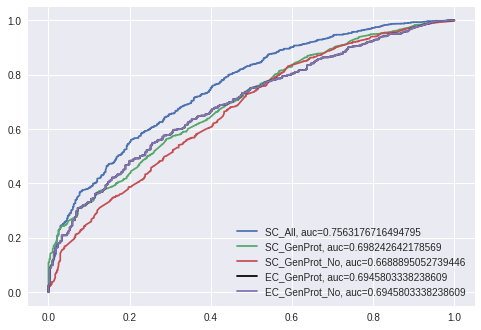

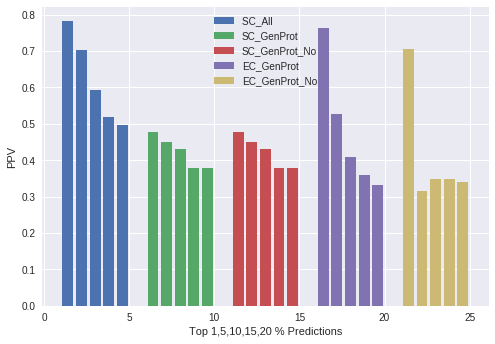

In [12]:
#Plot ROC
plt.plot(SC_Alltpr, SC_Allfpr,label="SC_All, auc="+str(1-SC_Allauc))
plt.plot(SC_GenProttpr, SC_GenProtfpr,label="SC_GenProt, auc="+str(1-SC_GenProtauc))
plt.plot(SC_GenProt_Notpr, SC_GenProt_Nofpr,label="SC_GenProt_No, auc="+str(1-SC_GenProt_Noauc))
plt.plot(EC_GenProttpr, EC_GenProtfpr,label="EC_GenProt, auc="+str(1-EC_GenProtauc), color='black')
plt.plot(EC_GenProt_Notpr, EC_GenProt_Nofpr,label="EC_GenProt_No, auc="+str(1-EC_GenProt_Noauc))
plt.legend(loc = 'lower right')
plt.show()

#Plot PPV
SC_AllArray = [SC_Allplotppv1,SC_Allplotppv5,SC_Allplotppv10,SC_Allplotppv15,SC_Allplotppv20]
SC_GenProtArray = [SC_GenProtplotppv1,SC_GenProtplotppv5,SC_GenProtplotppv10,SC_GenProtplotppv15,SC_GenProtplotppv20]
SC_GenProt_NoArray = [SC_GenProt_Noplotppv1,SC_GenProt_Noplotppv5,SC_GenProt_Noplotppv10,SC_GenProt_Noplotppv15,SC_GenProt_Noplotppv20]
EC_GenProtArray = [EC_GenProtplotppv1,EC_GenProtplotppv5,EC_GenProtplotppv10,EC_GenProtplotppv15,EC_GenProtplotppv20]
EC_GenProt_NoArray = [EC_GenProt_Noplotppv1,EC_GenProt_Noplotppv5,EC_GenProt_Noplotppv10,EC_GenProt_Noplotppv15,EC_GenProt_Noplotppv20]

x = [1,2,3,4,5]
y = [6,7,8,9,10]
z = [11,12,13,14,15]
i = [16,17,18,19,20]
j = [21,22,23,24,25]

plt.hist(x, bins=5, weights=SC_AllArray, rwidth=0.8, label = 'SC_All ')
plt.hist(y, bins=5, weights=SC_GenProtArray, rwidth=0.8, label = 'SC_GenProt')
plt.hist(z, bins=5, weights=SC_GenProt_NoArray, rwidth=0.8, label = 'SC_GenProt_No')
plt.hist(i, bins=5, weights=EC_GenProtArray, rwidth=0.8, label = 'EC_GenProt')
plt.hist(j, bins=5, weights=EC_GenProt_NoArray, rwidth=0.8, label = 'EC_GenProt_No')
plt.ylabel('PPV')
plt.xlabel('Top 1,5,10,15,20 % Predictions')
plt.legend(loc="upper center")

